# Dimensionality Reduction using an Autoencoder

## Creating An Autoencoder

In [1]:
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

autoencoder = tf.keras.Sequential()
#Encoder
autoencoder.add(Dense(512, input_shape = (784, )))
autoencoder.add(Dense(256, activation = 'relu'))
autoencoder.add(Dense(128, activation = 'relu'))
autoencoder.add(Dense(2))
#Decoder
autoencoder.add(Dense(128, activation = 'relu'))
autoencoder.add(Dense(256, activation = 'relu'))
autoencoder.add(Dense(512, activation = 'relu'))
autoencoder.add(Dense(784))

autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

## Load and Display the MNIST data set

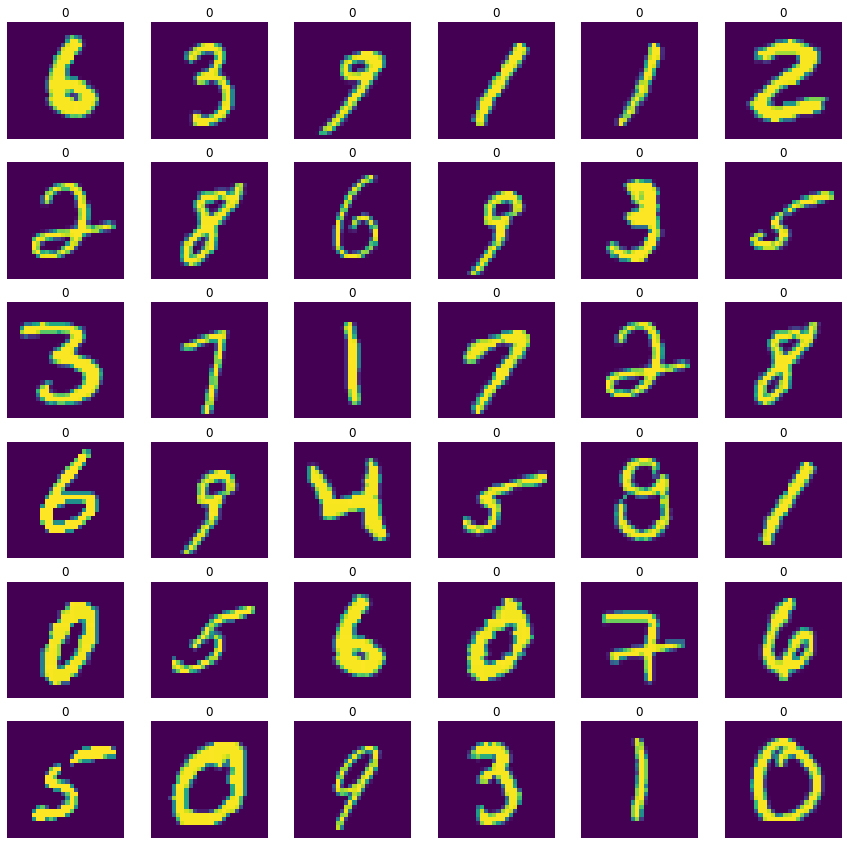

In [5]:
import matplotlib.pyplot as plt
import numpy as np

mnist_dataset = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()
train_images, test_images = train_images / 255, test_images / 255

fig, axes = plt.subplots(6, 6, figsize = (15, 15))

samples = np.array([
    [36, 98, 33, 23, 99, 25],
    [16, 17, 18, 19, 10, 11],
    [12, 42, 14, 15, 16, 17],
    [66, 19, 20, 65, 80, 23],
    [34, 35, 36, 37, 38, 39],
    [47, 51, 22, 74, 72, 88]
])

for row in range(0, 6):
    for col in range(0, 6):
        current_image = train_images[samples[row, col]]
        axes[row, col].set_title(str(train_labels[samples[row, col]].argmax()))
        axes[row, col].axis('off')
        axes[row, col].imshow(current_image)

train_images, test_images = train_images.reshape((-1, 784)), test_images.reshape((-1, 784))
images = np.vstack((train_images, test_images))
labels = np.append(train_labels, test_labels, axis = 0)

## Train Autoencoder

In [3]:
train_log = autoencoder.fit(images, images, epochs = 10)

Train on 70000 samples
Epoch 1/10
70000/70000 [==============================] - 25s 357us/sample - loss: 0.0480
Epoch 2/10
70000/70000 [==============================] - 24s 343us/sample - loss: 0.0429
Epoch 3/10
70000/70000 [==============================] - 24s 345us/sample - loss: 0.0418
Epoch 4/10
70000/70000 [==============================] - 25s 353us/sample - loss: 0.0411
Epoch 5/10
70000/70000 [==============================] - 24s 344us/sample - loss: 0.0401
Epoch 6/10
70000/70000 [==============================] - 25s 357us/sample - loss: 0.0395
Epoch 7/10
70000/70000 [==============================] - 25s 356us/sample - loss: 0.0392
Epoch 8/10
70000/70000 [==============================] - 24s 340us/sample - loss: 0.0387
Epoch 9/10
70000/70000 [==============================] - 24s 348us/sample - loss: 0.0380
Epoch 10/10
70000/70000 [==============================] - 27s 384us/sample - loss: 0.0381


## Extract Encoder to Map Digits into 2D space

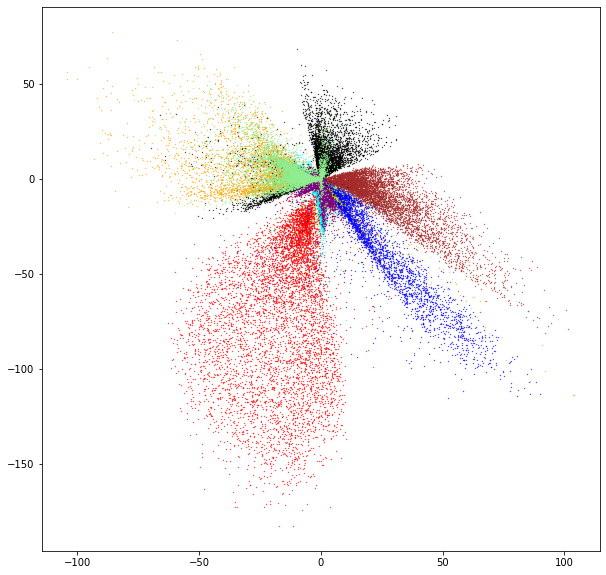

In [4]:
import pandas as pd

encoder = Sequential([autoencoder.layers[i] for i in range(4)])
reduced_data = encoder.predict(images)

plt.figure(figsize = (10, 10))

colors = [
    'red', 'green', 'blue', 'yellow', 'orange',
    'cyan', 'brown', 'black', 'purple', 'lightgreen'
]
for digit in range(10):
    data_points = pd.DataFrame(
        {
            'x': reduced_data[labels == digit, 0], 
            'y': reduced_data[labels == digit, 1], 
        }
    )

    plt.scatter(data_points['x'], data_points['y'], c = colors[digit], s = 0.10)
plt.show()